**Auto-encoders**


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [ ]:
input = np.array([[1,1,0,0,0,0],[1,0,0,0,1,0],[0,1,1,1,0,0],[1,1,0,0,1,0],[0,0,0,1,0,1]])
model=keras.Sequential(
    [
        layers.Dense(3,input_shape=(6,),activation='sigmoid'),
        layers.Dense(6,activation='sigmoid')
    ]
)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
model.fit(input,input,epochs=50)

Epoch 1/50
1/1 [==============================] - 1s 982ms/step - loss: 0.6782
Epoch 2/50
1/1 [==============================] - 0s 12ms/step - loss: 0.6776
Epoch 3/50
1/1 [==============================] - 0s 8ms/step - loss: 0.6770
Epoch 4/50
1/1 [==============================] - 0s 12ms/step - loss: 0.6764
Epoch 5/50
1/1 [==============================] - 0s 9ms/step - loss: 0.6758
Epoch 6/50
1/1 [==============================] - 0s 9ms/step - loss: 0.6753
Epoch 7/50
1/1 [==============================] - 0s 9ms/step - loss: 0.6747
Epoch 8/50
1/1 [==============================] - 0s 9ms/step - loss: 0.6741
Epoch 9/50
1/1 [==============================] - 0s 9ms/step - loss: 0.6735
Epoch 10/50
1/1 [==============================] - 0s 10ms/step - loss: 0.6730
Epoch 11/50
1/1 [==============================] - 0s 9ms/step - loss: 0.6724
Epoch 12/50
1/1 [==============================] - 0s 10ms/step - loss: 0.6718
Epoch 13/50
1/1 [==============================] - 0s 10ms/step - l

In [ ]:
from keras.datasets import mnist

In [ ]:
(train,_),(test,_)=mnist.load_data()

In [ ]:
train=train.reshape(len(train),784).astype('float32')/255.0
test=test.reshape(len(test),784).astype('float32')/255.0

In [ ]:
#code for autoencoder
input=keras.Input((784,))
encoder=keras.layers.Dense(128,activation='relu')(input)
encoder=keras.layers.Dense(64,activation='relu')(encoder)
encoder=keras.layers.Dense(32,activation='relu')(encoder)

decoder=keras.layers.Dense(64,activation='relu')(encoder)
decoder=keras.layers.Dense(128,activation='relu')(decoder)
obtained=keras.layers.Dense(784,activation='sigmoid')(decoder)

model=keras.Model(input,obtained)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
model.fit(train,train,epochs=25, validation_data=(test,test))

Epoch 1/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1046 - val_loss: 0.1004
Epoch 2/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0999 - val_loss: 0.0973
Epoch 3/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0970 - val_loss: 0.0949
Epoch 4/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0948 - val_loss: 0.0927
Epoch 5/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0933 - val_loss: 0.0916
Epoch 6/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0922 - val_loss: 0.0907
Epoch 7/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0913 - val_loss: 0.0903
Epoch 8/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0906 - val_loss: 0.0901
Epoch 9/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0901 - val_loss: 0.0893
Epoch 10/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.089

In [ ]:
predict=model.predict(test)

313/313 [==============================] - 1s 2ms/step


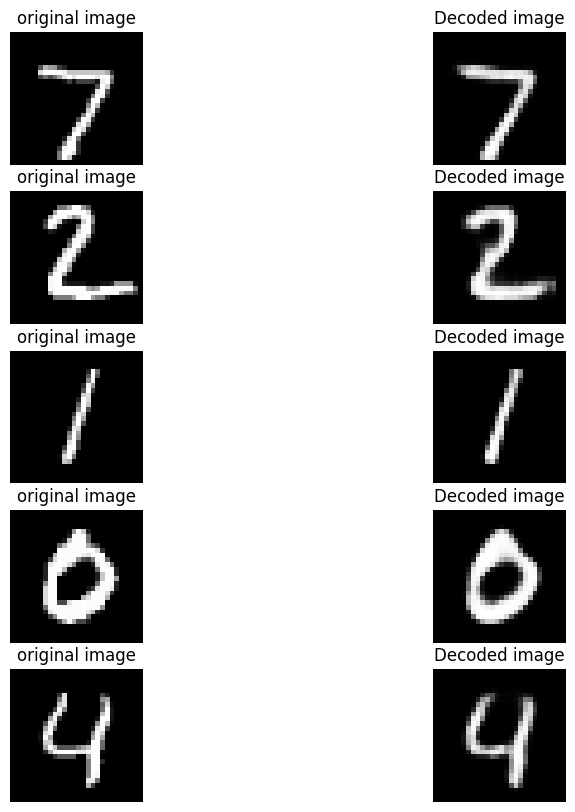

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
j=0
for i in range(5):
  plt.subplot(5,2,j+1)
  plt.title("original image")
  plt.imshow(test[i].reshape(28,28),cmap='gray')
  plt.axis('off')
  plt.subplot(5,2,j+2)
  plt.title("Decoded image")
  plt.imshow(predict[i].reshape(28,28),cmap='gray')
  plt.axis('off')
  j+=2